# Logbook for PHAS0030 Mini-project
Author: Joel Pérez Ferrer

SN: 18082660

Year 2019-2020

Group 7 (BrazilNuts), supervised by Zara Grout.

## 30/01/2020: First meeting with supervisor

Looked through the given paper and done a bit of research on MC methods. 
Went over some points in common. 

**Notes partially provided by our supervisor**

- How does the experiment look? Completely 2D with an infinite height - concentrating on the bottom of the box.

- Do we need to display the configurations? No and wouldn't probably slow the simulation far too much, but could have snapshots after certain number of iterations (say every 1000). Would be useful to at least plot the starting and ending configurations, as seen in the referenced paper.

- How does the shaking work? Particles are all moved upwards and as MC is run they will start to move towards the bottom of the box as moves downwards will be energetically favourable for the particles due to gravity.

- Some discussion of how much physics is included in the simulation.

- Discussion of size of particles to use and whether they will all have same density.

- Start with the setup and listed functions which can be carried out without running the MC, and perhaps reviewing MC material covered in last years mathematica course.

- Should we cite sources for code found from the internet? Yes if this is more than explanation of function arguments or similar. Good practice anyway to understand solutions and think whether you can better adapt them to the problem you are looking at.

- Log books: make sure to note when you meet and discuss aspects, good idea to keep note of these meetings too in some form. Good to note any failures or problems.

- Various possibilities to extend once instructions have been followed, best to complete task as detailed first.

- We are restricted to `matplotlib`, `numpy` and `scipy` and adviced to be using only 'core' functionality of Python (i.e. no dictionaries or OOP)

# 5/02/2020: Set-up & visualisation
The document associated with this mini-project contained a list of chunks of code that were going to be needed before we implement the Monte Carlo method:
  * ~~Code to check whether particle (i.e. a nut or any other bit of muesli) overlaps the sides or bottom of the box.~~
  * ~~Code to check whether two particles overlap.~~
  * ~~Code to find the largest nearest-neighbour distance between particles (that is, find the shortest distance from each particle to any other particle, and then find the largest of those distances.~~
  * ~~Code to draw the arrangement of particles.~~
  * ~~Code to determine the potential energy~~

In [351]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import random as rand

In [352]:
# Here we will be defining some constants:
b_nut_r = 1.0         # Radius of the brazilian nut
radii = [0.5, 1.0]    
r_nut_r = b_nut_r/2   # Radius of the rest of the nuts
h_allocation = 1.0    # Distance between each nut in the set-up
box_w = 5.0          # Width of the box

In [353]:
def display_box(nuts, positions, show_axis):
    """
    Displays the box of nuts.
    
    Args:
        nuts: array describing the type of every nut. 0: regular 1: brazilian.
        positions: 2D array describing the x and y coordinate of every nut.
        show_axis: bool on whether or not to display labels and values in the axes.
        
    Returns:
        Nothing, but outputs the rending in the screen.
    """
    circle_list = []
    for i in range(len(nuts)):
        if nuts[i] == 1:
            new_circle = plt.Circle(positions[i], radii[1], color='r')
            circle_list.append(new_circle)
        elif nuts[i] == 0:
            new_circle = plt.Circle(positions[i], radii[0], color='r')
            circle_list.append(new_circle)

    fig, ax = plt.subplots(figsize=(5, 10))
    
    ax.set_xlim([0, box_w])
    ax.set_ylim([0, 10])
    
    
    for drawn_circle in circle_list:
        ax.add_artist(drawn_circle)

In [354]:
def initial_preparation(max_n, b_nut_chance):
    """
    Prepares the initial set of nuts according to the document.
    Always starts with a brazilian nut at the bottom.
    
    Args:
        max_n: maximum number of nuts
        b_nut_chance: chance for a nut to be brazilian
    
    Returns: 
        nuts: array of the types of nuts generated. 1 is brazilian, 0 is regular
        positions: 2D array of the locations of the nuts
    """
    nuts = np.zeros(max_n)
    positions = np.zeros((max_n,2))
    
    current_h = radii[1]
    nuts[0] = 1
    positions[0] = np.array([rand.randrange(radii[1], box_w-radii[1]), current_h])
    n = 1
    current_h = radii[0] + radii[1]

    
    while n < max_n:
        current_h += 2*radii[0]
        nuts[n] = 0
        positions[n] = np.array([rand.uniform(radii[0], box_w-radii[0]), current_h])
        n += 1
    return nuts, positions

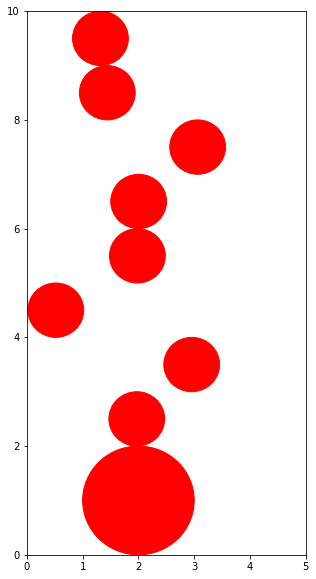

In [355]:
# Let's play around with our functions now! 
nuts, positions = initial_preparation(11, 0)
display_box(nuts, positions,0)

In [356]:
def check_overlap_walls(nut, position):
    """
    Checks if a nut in a given position overlaps with the bottom or the sides of the box
    
    Args: 
        nut: type of the nut
        position: array of the x and y coordinates of the nut
    Returns:
        bool True if the nut overlaps with the walls of the box
    """
    if position[0] >= radii[int(nut)] and position[0] <= box_w-radii[int(nut)] and position[1] > radii[int(nut)]:
        return False
    else: 
        return True

In [357]:
def check_overlap_nuts(nut1, position1, nut2, position2):
    """
    Checks if two nuts in the given positions overlap with each other 
    
    Args: 
        nut1: type of the first nut
        position1: array of the x and y coordinates of the first nut 
        nut2: type of the second nut
        position2: array of the x and y coordinates of the second nut 
    """
    if np.sqrt((position1[0]-position2[0])**2 + (position1[1]-position2[1])**2) > (radii[int(nut1)]+radii[int(nut2)]):
        return False
    else: 
        return True

False


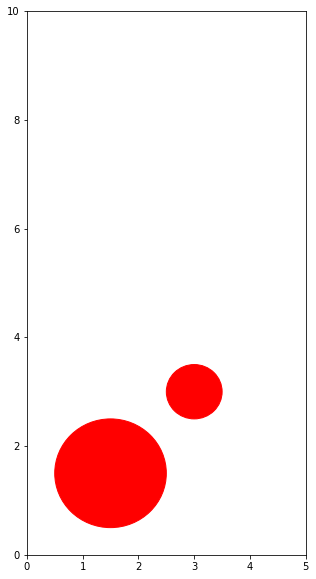

In [358]:
position1 = [1.5, 1.5]
position2 = [3.0, 3.0]
print(check_overlap_nuts(1, position1, 0, position2))
display_box([1,0], [position1, position2],0)

In [359]:
def largest_nearest_neighbor(nuts, positions):
    """
    Returns the largest possible shortest distance between the given array of particles.
    
    Args:
        nuts: array containing the types of nuts
        positions: array containing the x and y corrdinates of the positions of the nuts
    Returns:
        largest_distance: largest distance found
        a: index of the first nut
        b: index of the second nut
    """
    largest_distance = 0
    a = 0
    b = 0
    for i in range(len(nuts)):
        for j in  range(len(nuts)):
            dij = np.sqrt((positions[i][0]-positions[j][0]-radii[int(nuts[i])]-radii[int(nuts[j])])**2 + (positions[i][1]-positions[j][1]-radii[int(nuts[i])]-radii[int(nuts[j])])**2)
            if dij > largest_distance:
                largest_distance = dij
                a = i
                b = j 
    return largest_distance, a, b

In [360]:
position1 = [1.5, 1.0]
position2 = [3.0, 3.0]
position3 = [3.5, 3.5]
print(largest_nearest_neighbor([0,0,0], [position1, position2, position3]))

(4.6097722286464435, 0, 2)


In [361]:
def energy(positions):
    """
    Calculates E/mg of the system given the positions of the nuts
    
    Args: 
        positions: x and y coordinates of the nuts
    Returns:
        Sum of E/mg for all the nuts in the system 
    """
    energy = 0
    for position in positions:
        energy += position[1]
    return energy

In [362]:
print(energy([position1, position2, position3]))

7.5


# 6/02/2020: Initial Monte Carlo method 
The task is to do the following: 
  * Pick a particle at random.
  * Move it a random distance horizontally and vertically.
  * If the move improves the energy and is physically possible (does not lead to overlaps), accept it.
  
Some points to note are:
  * The algorithm __does not__ follow the path of a particle. The particle just "jumps".
  * The particles move side ways as well as vertically.
  * Use the largest nearest-neighbour distance to control the step length.

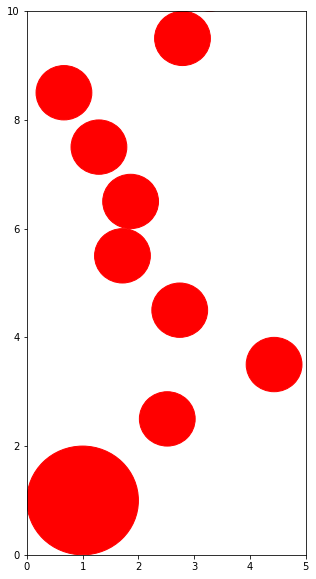

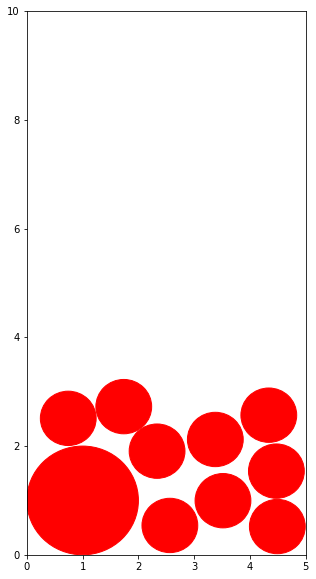

In [363]:
max_n = 10
nuts, positions = initial_preparation(max_n, 0)
display_box(nuts, positions,0)

iters = 0
while iters < 100:
    iters += 1
    max_step_length = largest_nearest_neighbor(nuts,positions)[0]
    inner_iters = 0
    while inner_iters < 1000:
        inner_iters += 1
        current = rand.randrange(max_n)
        x_step = rand.uniform(- max_step_length, max_step_length)
        y_step = rand.uniform(- max_step_length, 0)
        new_positions = np.copy(positions)
        new_nuts = np.copy(nuts)
        new_positions[current] = [new_positions[current][0]+x_step, new_positions[current][1]+y_step]
        nuts_to_check = np.delete(new_nuts, current)
        positions_to_check = np.delete(new_positions,current, axis=0)
        
        # Testing for overlap with walls
        if check_overlap_walls(nuts[current], new_positions[current]):
                continue
        
        # Testing for collisions
        passed_collisions = True        
        for i in range(len(nuts_to_check)):
            if check_overlap_nuts(nuts_to_check[i], positions_to_check[i], nuts[current], new_positions[current]):
                passed_collisions = False
                break
        if not passed_collisions:
            continue
        
        # Test for energy:
        if energy(positions) > energy(new_positions):
            positions = new_positions
            valid_move = True
display_box(nuts, positions,0)


In [364]:
def shake_box(positions):
    """
    Shakes the box, multiplying all the vertical coordinates by 2
    """
    new_positions = np.zeros(positions.shape)
    for i in range(len(new_positions)):
        new_positions[i] = np.array([positions[i][0], 2*positions[i][1]])
    return new_positions

In [391]:
def mc_method(nuts, positions, max_moves, max_attempts):
    current_positions = np.copy(positions)
    iters = 0
    while iters < 100:
        iters += 1
        max_step_length = largest_nearest_neighbor(nuts,current_positions)[0]
        inner_iters = 0
        while inner_iters < 1000:
            inner_iters += 1
            current = rand.randrange(max_n)
            x_step = rand.uniform(- max_step_length, max_step_length)
            y_step = rand.uniform(- max_step_length, 0)
            new_positions = np.copy(current_positions)
            new_nuts = np.copy(nuts)
            new_positions[current] = [new_positions[current][0]+x_step, new_positions[current][1]+y_step]
            nuts_to_check = np.delete(new_nuts, current)
            positions_to_check = np.delete(new_positions,current, axis=0)

            # Testing for overlap with walls
            if check_overlap_walls(nuts[current], new_positions[current]):
                    continue

            # Testing for collisions
            passed_collisions = True        
            for i in range(len(nuts_to_check)):
                if check_overlap_nuts(nuts_to_check[i], positions_to_check[i], nuts[current], new_positions[current]):
                    passed_collisions = False
                    break
            if not passed_collisions:
                continue

            # Test for energy:
            if energy(positions) > energy(new_positions):
                current_positions = new_positions
                valid_move = True
    return nuts, current_positions


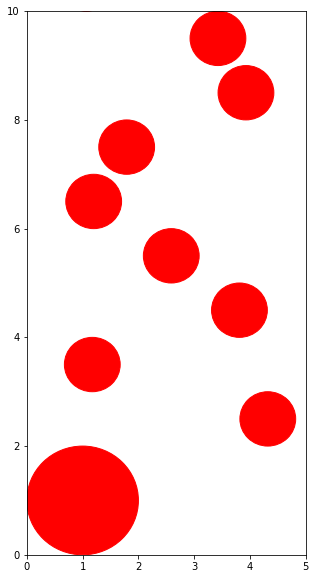

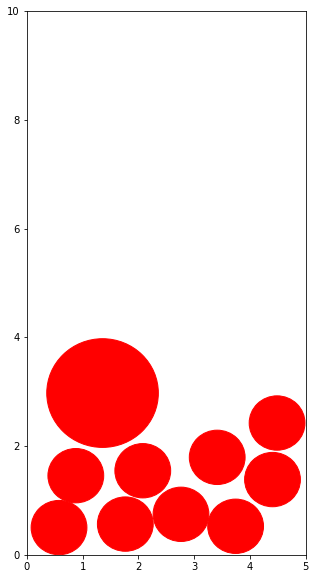

In [403]:
max_n = 10
nuts, positions = initial_preparation(max_n, 0)
display_box(nuts, positions,0)
positions_after_shake = np.copy(positions)

shake_iters = 20
for i in range(shake_iters):
    next_nuts, positions_after_shake = mc_method(nuts, positions_after_shake, 0, 0)
    if i is not shake_iters-1:
        positions_after_shake = shake_box(positions_after_shake)

    
display_box(nuts, positions_after_shake,0)
